In [1]:
import sys
import sklearn
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# Clusterização

## K-Means

In [2]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8], [-2.8, 2.8], [-2.8, 1.3]]
)
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(
    n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=7
)

In [3]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

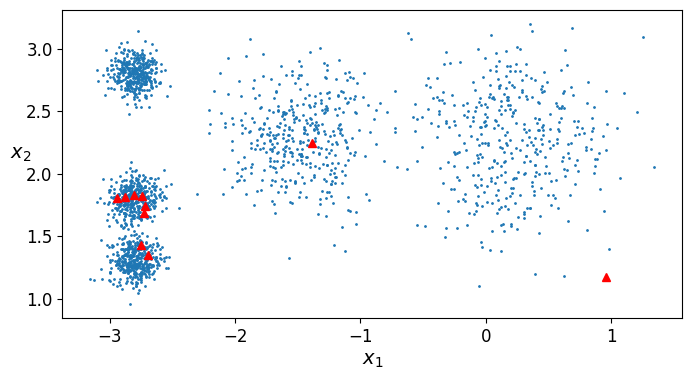

In [4]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.plot(X[:10, 0], X[:10, 1], "r^")
plt.show()

In [5]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=50)
y_pred = kmeans.fit_predict(X)

In [6]:
y_pred

array([0, 4, 1, ..., 3, 1, 4], dtype=int32)

In [7]:
y_pred is kmeans.labels_

True

In [8]:
kmeans.cluster_centers_

array([[-2.80037642,  1.30082566],
       [ 0.20876306,  2.25551336],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80389616,  1.80117999]])

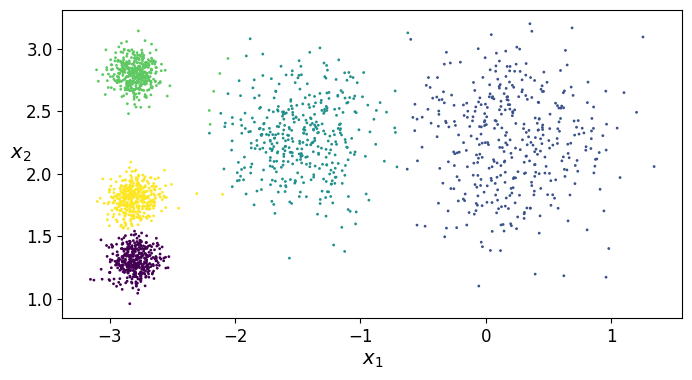

In [9]:
plt.figure(figsize=(8, 4))
plot_clusters(X, y_pred)
plt.show()

In [10]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 3, 3], dtype=int32)

In [11]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], "k.", markersize=2)


def plot_centroids(centroids, weights=None, circle_color="w", cross_color="k"):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="o",
        s=35,
        linewidths=8,
        color=circle_color,
        zorder=10,
        alpha=0.9,
    )
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=2,
        linewidths=12,
        color=cross_color,
        zorder=11,
        alpha=1,
    )


def plot_decision_boundaries(
    clusterer,
    X,
    resolution=1000,
    show_centroids=True,
    show_xlabels=True,
    show_ylabels=True,
):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(
        np.linspace(mins[0], maxs[0], resolution),
        np.linspace(mins[1], maxs[1], resolution),
    )
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(
        Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2"
    )
    plt.contour(
        Z,
        extent=(mins[0], maxs[0], mins[1], maxs[1]),
        linewidths=1,
        colors="k",
    )
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

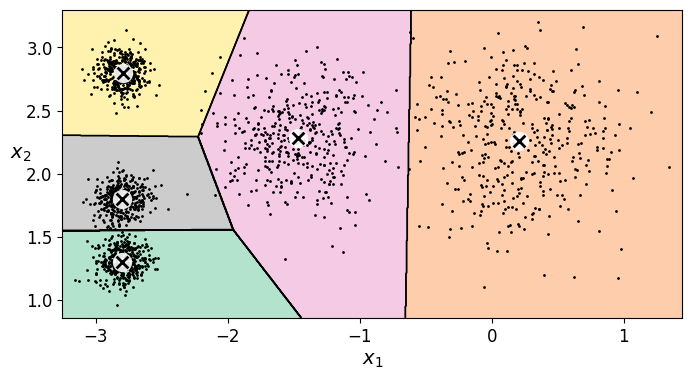

In [12]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [13]:
kmeans.transform(X_new)

array([[2.88633901, 0.32995317, 1.49439034, 2.9042344 , 2.81093633],
       [5.84236351, 2.80290755, 4.4759332 , 5.84739223, 5.80730058],
       [1.71086031, 3.29399768, 1.69136631, 0.29040966, 1.21475352],
       [1.21567622, 3.21806371, 1.54808703, 0.36159148, 0.72581411]])

## Métodos de inicialização do centroide

In [14]:
kmeans.inertia_

211.5985372581684

## Usando a clusterização para a segmentação de imagens

In [15]:
import urllib

# Download the ladybug image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\unsupervised_learning\\ladybug.png',
 <http.client.HTTPMessage at 0x244c97dbec0>)

In [16]:
from matplotlib.image import imread

image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

In [17]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [18]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

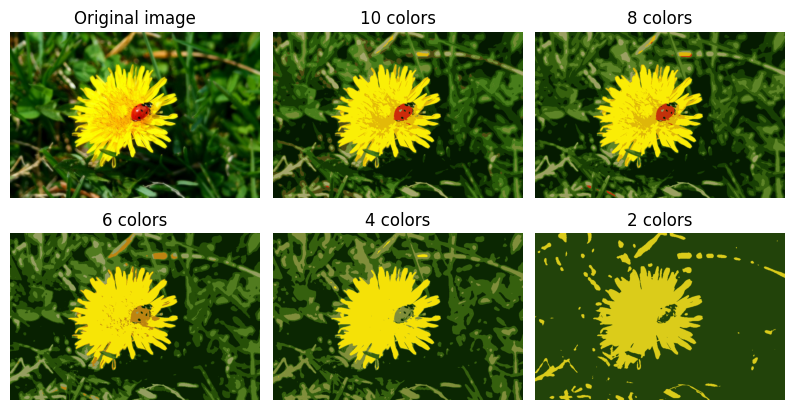

In [19]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis("off")

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis("off")

plt.show()

## Usando a clusterização para o pré-processamento

In [20]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

log_reg = OneVsRestClassifier(
    LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42)
)
log_reg.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=5000,
                                                 random_state=42))

In [23]:
log_reg.score(X_test, y_test)

0.9488888888888889

In [24]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(
    [
        ("kmeans", KMeans(n_clusters=50, random_state=42)),
        (
            "log_reg",
            OneVsRestClassifier(
                LogisticRegression(
                    solver="lbfgs", max_iter=5000, random_state=42
                )
            ),
        ),
    ]
)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 OneVsRestClassifier(estimator=LogisticRegression(max_iter=5000,
                                                                  random_state=42)))])

In [25]:
pipeline.score(X_test, y_test)

0.9688888888888889

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.0s
[CV] END ...............................kmeans_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        OneVsRestClassifier(estimator=LogisticRegression(max_iter=5000,
                                                                                         random_state=42)))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [27]:
grid_clf.best_estimator_

Pipeline(steps=[('kmeans', KMeans(n_clusters=57, random_state=42)),
                ('log_reg',
                 OneVsRestClassifier(estimator=LogisticRegression(max_iter=5000,
                                                                  random_state=42)))])

In [28]:
grid_clf.score(X_test, y_test)

0.9688888888888889

In [29]:
grid_clf.score(X_train, y_train)

0.9985152190051967

## Usando a clusterização para aprendizado semissupervisionado

In [30]:
n_labeled = 50

log_reg = OneVsRestClassifier(
    LogisticRegression(solver="lbfgs", random_state=42)
)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.7777777777777778

In [31]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]
X_representative_digits

array([[ 0.,  0., 11., ..., 16., 16., 12.],
       [ 0.,  0.,  2., ..., 14.,  2.,  0.],
       [ 0.,  0.,  0., ...,  9.,  0.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  7., ..., 10.,  1.,  0.],
       [ 0.,  0.,  0., ...,  2.,  0.,  0.]])

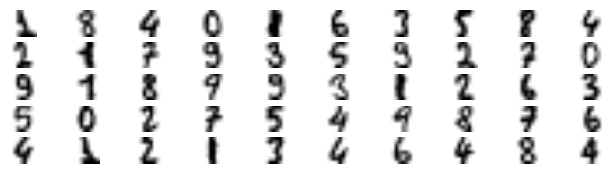

In [32]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(
        X_representative_digit.reshape(8, 8),
        cmap="binary",
        interpolation="bilinear",
    )
    plt.axis("off")

plt.show()

In [33]:
y_representative_digits = y_train[representative_digit_idx]

In [34]:
log_reg = OneVsRestClassifier(
    LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42)
)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9

In [35]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)

for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [36]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_train_propagated)

0.9510022271714922

In [37]:
log_reg = OneVsRestClassifier(
    LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42)
)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.92

In [38]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = kmeans.labels_ == i
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = X_cluster_dist > cutoff_distance
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = X_cluster_dist != -1
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [39]:
log_reg = OneVsRestClassifier(
    LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42)
)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9266666666666666

## DBSCAN

In [40]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [41]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [42]:
dbscan.labels_

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5,  2,  3,  0,  2,  2,  2,  4,
        2,  2,  4,  0,  5,  1,  0,  5,  5,  3,  2,  2,  2,  4,  5,  0,  6,
        1, -1,  0,  0,  2,  3, -1,  3,  4, -1,  4,  4,  2,  0,  6,  2,  0,
        2,  4,  0,  3,  3,  0,  3,  5,  2, -1,  3,  0,  5,  0,  0,  0,  2,
        3,  0,  3,  6,  0,  2,  4,  4,  0,  3,  0,  4,  0,  3, -1,  3,  4,
        0, -1,  2,  2,  4,  1,  6,  0,  5,  2,  6,  2,  3,  3, -1,  2, -1,
        2,  4,  0,  0,  0,  2,  5,  2,  0,  2, -1,  2,  3,  1,  5,  2,  0,
        4,  2,  1,  2,  4,  4,  0,  0,  6,  2,  2,  0,  2, -1,  2,  0,  3,
        3,  5, -1,  3,  3,  5,  2,  4,  2,  2,  2,  4,  2,  4,  0, -1,  2,
        1,  2,  6,  4,  2,  3,  2, -1,  2,  0,  0,  2,  0,  4,  0,  4,  4,
        1,  6,  3,  2,  6,  1,  4,  4,  2,  0,  6,  0,  1,  0,  2,  5,  1,
        1,  2,  2,  2,  2,  0,  5,  5,  1,  4,  5,  0,  3,  3,  0,  0,  0,
        2,  0,  5,  2, -1,  2,  3,  5,  2,  2,  0,  4,  0,  4,  2,  2,  4,
        2,  2,  3,  2,  3

In [43]:
len(dbscan.core_sample_indices_)

808

In [44]:
dbscan.core_sample_indices_

array([  0,   4,   5,   6,   7,   8,  10,  11,  12,  13,  14,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  28,  29,  30,  31,
        32,  33,  34,  36,  38,  39,  41,  42,  44,  45,  47,  49,  50,
        51,  52,  53,  54,  55,  56,  58,  59,  61,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  83,  84,  85,  87,  88,  89,  90,  91,  93,  94,  96,
        97,  98, 102, 103, 104, 105, 106, 107, 108, 109, 110, 113, 114,
       115, 116, 117, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 135, 136, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149,
       150, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 172, 173, 174, 175, 176, 177, 178,
       179, 181, 182, 183, 185, 186, 187, 188, 189, 191, 193, 194, 195,
       196, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210,
       211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 222, 22

In [45]:
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

In [46]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [47]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(
        cores[:, 0],
        cores[:, 1],
        c=dbscan.labels_[core_mask],
        marker="o",
        s=size,
        cmap="Paired",
    )
    plt.scatter(
        cores[:, 0], cores[:, 1], marker="*", s=20, c=dbscan.labels_[core_mask]
    )
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker="x", s=100)
    plt.scatter(
        non_cores[:, 0],
        non_cores[:, 1],
        c=dbscan.labels_[non_core_mask],
        marker=".",
    )
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(
        "eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples),
        fontsize=14,
    )

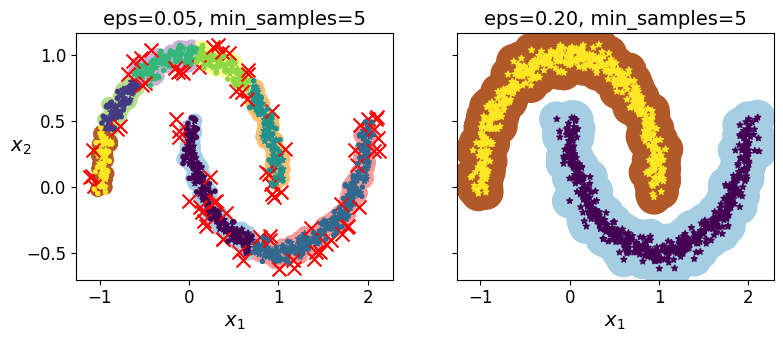

In [48]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

In [49]:
dbscan = dbscan2

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [51]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [52]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

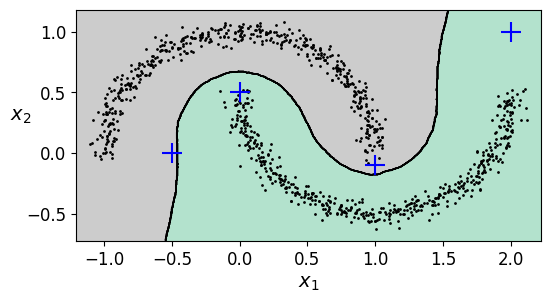

In [53]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

In [54]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1])

# Misturas de Gaussianas

In [55]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
y2[:] = 2
X = np.r_[X1, X2]
y = np.r_[y1, y2]

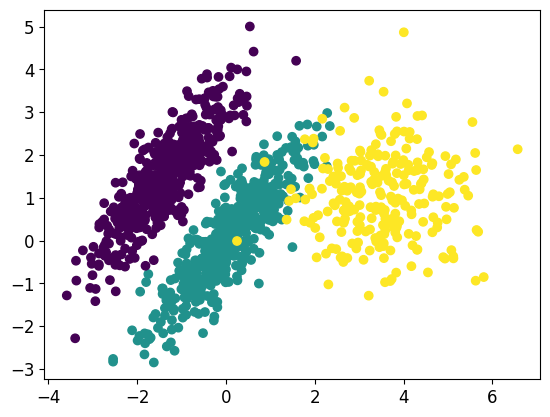

In [56]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [57]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [58]:
gm.weights_

array([0.40005972, 0.20961444, 0.39032584])

In [59]:
gm.means_

array([[-1.40764129,  1.42712848],
       [ 3.39947665,  1.05931088],
       [ 0.05145113,  0.07534576]])

In [60]:
gm.covariances_

array([[[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]]])

In [61]:
gm.converged_

True

In [62]:
gm.n_iter_

4

In [63]:
gm.predict(X)

array([2, 2, 0, ..., 1, 1, 1])

In [64]:
gm.predict_proba(X)

array([[6.76282339e-07, 2.31833274e-02, 9.76815996e-01],
       [6.74575575e-04, 1.64110061e-02, 9.82914418e-01],
       [9.99922764e-01, 1.99781831e-06, 7.52377580e-05],
       ...,
       [2.12540639e-26, 9.99999568e-01, 4.31902443e-07],
       [1.45002917e-41, 1.00000000e+00, 5.20915318e-16],
       [7.93266114e-41, 1.00000000e+00, 2.30971331e-15]])

In [65]:
X_new, y_new = gm.sample(6)
X_new

array([[-2.32491052,  1.04752548],
       [-1.16654983,  1.62795173],
       [ 1.84860618,  2.07374016],
       [ 3.98304484,  1.49869936],
       [ 3.8163406 ,  0.53038367],
       [ 0.38079484, -0.56239369]])

In [66]:
y_new

array([0, 0, 1, 1, 1, 2])

In [67]:
gm.score_samples(X)

array([-2.60786904, -3.57094519, -3.3302143 , ..., -3.51359636,
       -4.39793229, -3.80725953])

In [68]:
np.exp(gm.score_samples(X))

array([0.07369141, 0.02812925, 0.03578544, ..., 0.02978959, 0.01230275,
       0.02220896])

In [104]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

np.float64(0.9999999999225081)

In [105]:
from matplotlib.colors import LogNorm


def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(
        np.linspace(mins[0], maxs[0], resolution),
        np.linspace(mins[1], maxs[1], resolution),
    )
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(
        xx,
        yy,
        Z,
        norm=LogNorm(vmin=1.0, vmax=30.0),
        levels=np.logspace(0, 2, 12),
    )
    plt.contour(
        xx,
        yy,
        Z,
        norm=LogNorm(vmin=1.0, vmax=30.0),
        levels=np.logspace(0, 2, 12),
        linewidths=1,
        colors="k",
    )

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidths=2, colors="r", linestyles="dashed")

    plt.plot(X[:, 0], X[:, 1], "k.", markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

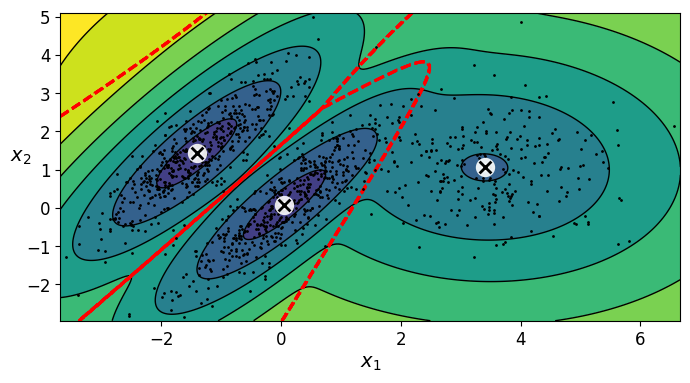

In [110]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

plt.show()

## Detecção de anomalias usando as misturas de gaussianas

In [107]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]
anomalies

array([[-0.11118987,  1.61334992],
       [ 0.62362922,  4.41540435],
       [ 1.49808977, -0.15251688],
       [ 0.74219223, -1.00445177],
       [-2.53940854, -2.76549965],
       [-1.62447969, -0.45770022],
       [-1.74680316, -0.78385111],
       [-3.58308316, -1.28249917],
       [ 0.53903026,  5.00244257],
       [-0.51480414, -2.16270124],
       [-1.81015204, -0.58926015],
       [-1.79651788, -0.97031471],
       [-2.11225785, -2.09712817],
       [-3.39408574, -2.28378778],
       [ 1.58082729,  4.20122873],
       [-2.48037945, -1.18651064],
       [-2.93972237, -1.41660564],
       [-1.62285961, -2.84860478],
       [-0.25954463, -1.7743691 ],
       [ 0.46018217,  2.78323717],
       [-2.06317379,  2.2670332 ],
       [ 0.13982849,  2.08023553],
       [-2.54004484, -2.8290338 ],
       [-1.93037427, -1.19447352],
       [-0.27124433, -1.86750177],
       [-1.15568262, -2.57480367],
       [-1.93315582,  2.49030105],
       [ 4.93207567, -0.42157602],
       [ 5.80546094,

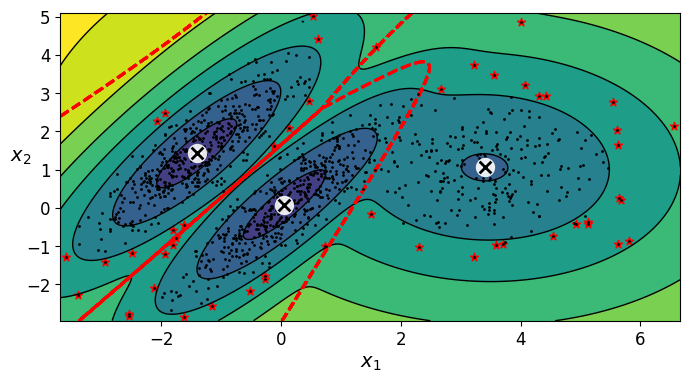

In [116]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color="r", marker="*")
plt.ylim(top=5.1)

plt.show()